In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
beer_df = pd.read_csv("D:\\DataSets\\Machine Learning (Codes and Data Files)\\Data\\beer.csv")
beer_df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [33]:
beer_df.shape

(20, 5)

In [34]:
beer_df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

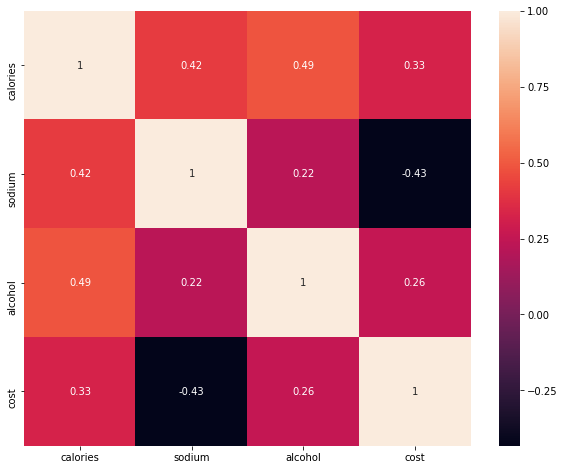

In [35]:
plt.figure(figsize=(10,8))
cor = beer_df.corr()
sns.heatmap(cor,annot=True)

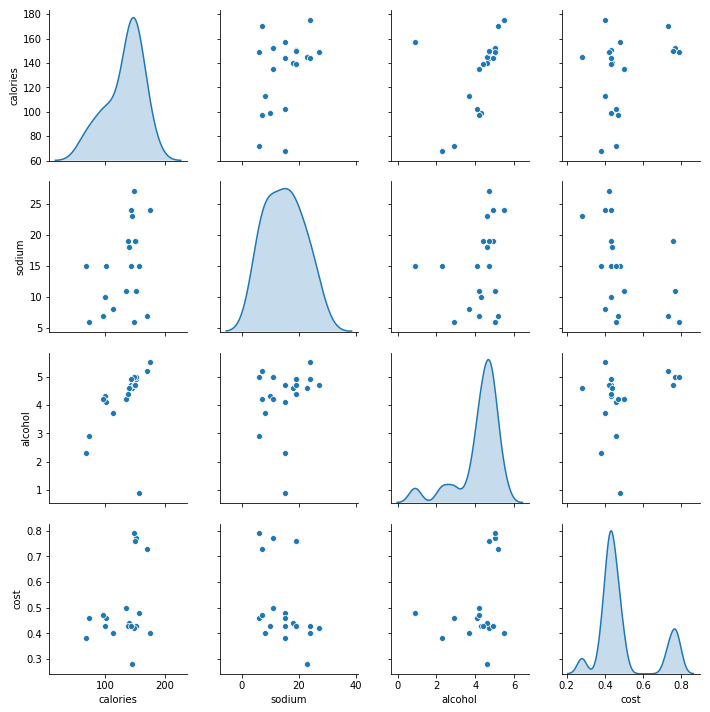

In [36]:
sns.pairplot(beer_df,diag_kind='kde')

# Scaling the Data to normalize  the features

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories', 'sodium', 'alcohol', 'cost']])

In [38]:
scaled_beer_df.shape

(20, 4)

# K-Means Clustering

In [106]:
from sklearn.cluster import KMeans

cluster_range = range(1,14)
cluster_errors = []
for num_clusters in cluster_range:
    model = KMeans(num_clusters)
    model.fit(scaled_beer_df)
    cluster_errors.append(model.inertia_)

In [107]:
cluster_errors

[80.0,
 51.45915294696046,
 27.849901261962508,
 17.843594755875053,
 12.388814853702119,
 9.57066496027912,
 7.2329082920535495,
 6.376939648451391,
 4.774245752244272,
 3.783781829335524,
 2.805755519511925,
 1.9759284907227754,
 1.5367500868688033]

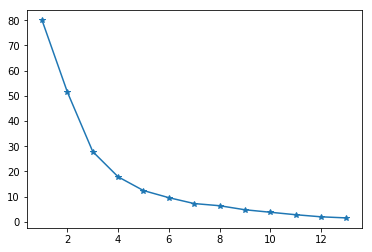

In [108]:
plt.plot(cluster_range,cluster_errors,marker='*')

In [109]:
#3-cluster

kmeans = KMeans(n_clusters =3,random_state=42)
kmeans.fit(scaled_beer_df)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.5361335 ,  0.96264295,  0.51632566, -0.61618888],
       [-0.92065895, -0.6352664 , -0.86290041, -0.33288365],
       [ 0.7690509 , -0.6547531 ,  0.69314951,  1.89814505]])

In [110]:
kmeans.labels_

array([0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1])

In [111]:
beer_df['label']=kmeans.labels_
beer_df.head()

,name,calories,sodium,alcohol,cost,label
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,1
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2


In [112]:
g0 = beer_df[beer_df['label']==0]
g1 = beer_df[beer_df['label']==1]
g2 = beer_df[beer_df['label']==2]

In [113]:
g0.describe()

,calories,sodium,alcohol,cost,label
count,8.000000,8.00000,8.000000,8.000000,8.0
mean,148.375000,21.12500,4.787500,0.407500,0.0
std,11.488348,3.97986,0.331393,0.052847,0.0
min,139.000000,15.00000,4.400000,0.280000,0.0
25%,143.000000,18.75000,4.600000,0.415000,0.0
50%,144.500000,21.00000,4.700000,0.430000,0.0
75%,149.500000,24.00000,4.900000,0.430000,0.0
max,175.000000,27.00000,5.500000,0.440000,0.0


In [114]:
g1.describe()

,calories,sodium,alcohol,cost,label
count,8.000000,8.000000,8.000000,8.00000,8.0
mean,105.375000,10.875000,3.325000,0.44750,1.0
std,29.842144,3.758324,1.215084,0.04097,0.0
min,68.000000,6.000000,0.900000,0.38000,1.0
25%,90.750000,7.750000,2.750000,0.42250,1.0
50%,100.500000,10.500000,3.900000,0.46000,1.0
75%,118.500000,15.000000,4.200000,0.47250,1.0
max,157.000000,15.000000,4.300000,0.50000,1.0


In [115]:
g2.describe()

,calories,sodium,alcohol,cost,label
count,4.000000,4.000000,4.000000,4.0000,4.0
mean,155.250000,10.750000,4.975000,0.7625,2.0
std,9.912114,5.909033,0.206155,0.0250,0.0
min,149.000000,6.000000,4.700000,0.7300,2.0
25%,149.750000,6.750000,4.925000,0.7525,2.0
50%,151.000000,9.000000,5.000000,0.7650,2.0
75%,156.500000,13.000000,5.050000,0.7750,2.0
max,170.000000,19.000000,5.200000,0.7900,2.0


In [116]:
kmeans.inertia_

27.849901261962508

In [117]:
L = pd.DataFrame(kmeans.labels_)
L[0].value_counts()

1    8
0    8
2    4
Name: 0, dtype: int64

# Agglomerative Clustering

In [93]:
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
model2.fit(scaled_beer_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [94]:
L1 = pd.DataFrame(model2.labels_)
L1[0].value_counts()

1    8
0    8
2    4
Name: 0, dtype: int64

In [121]:
beer_df['label']=model2.labels_
beer_df.head()

,name,calories,sodium,alcohol,cost,label
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2


In [96]:
df0 = beer_df[beer_df['label']==0]
df1 = beer_df[beer_df['label']==1]
df2 = beer_df[beer_df['label']==2]

In [97]:
df2

,name,calories,sodium,alcohol,cost,label
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [99]:
df3 = beer_df[beer_df['label']==0]
df4 = beer_df[beer_df['label']==1]
df5 = beer_df[beer_df['label']==2]

In [102]:
c3 = np.array(df3.iloc[:,1:5].mean())
print(c3)
c4 = np.array(df4.iloc[:,1:5].mean())
print(c4)
c5 = np.array(df5.iloc[:,1:5].mean())
print(c5)

[105.375   10.875    3.325    0.4475]
[148.375   21.125    4.7875   0.4075]
[155.25    10.75     4.975    0.7625]


In [104]:
I0=0
I1=0
I2=0
for i in np.arange(df3.shape[0]):
    I0=I0+np.sum((df3.iloc[i,1:5]-c3)**2)
for i in np.arange(df4.shape[0]):
    I1=I1+np.sum((df4.iloc[i,1:5]-c4)**2)
for i in np.arange(df5.shape[0]):
    I2=I2+np.sum((df5.iloc[i,1:5]-c5)**2)

In [105]:
tot = I0+I1+I2
tot

7778.264425000001

# Dendrogram

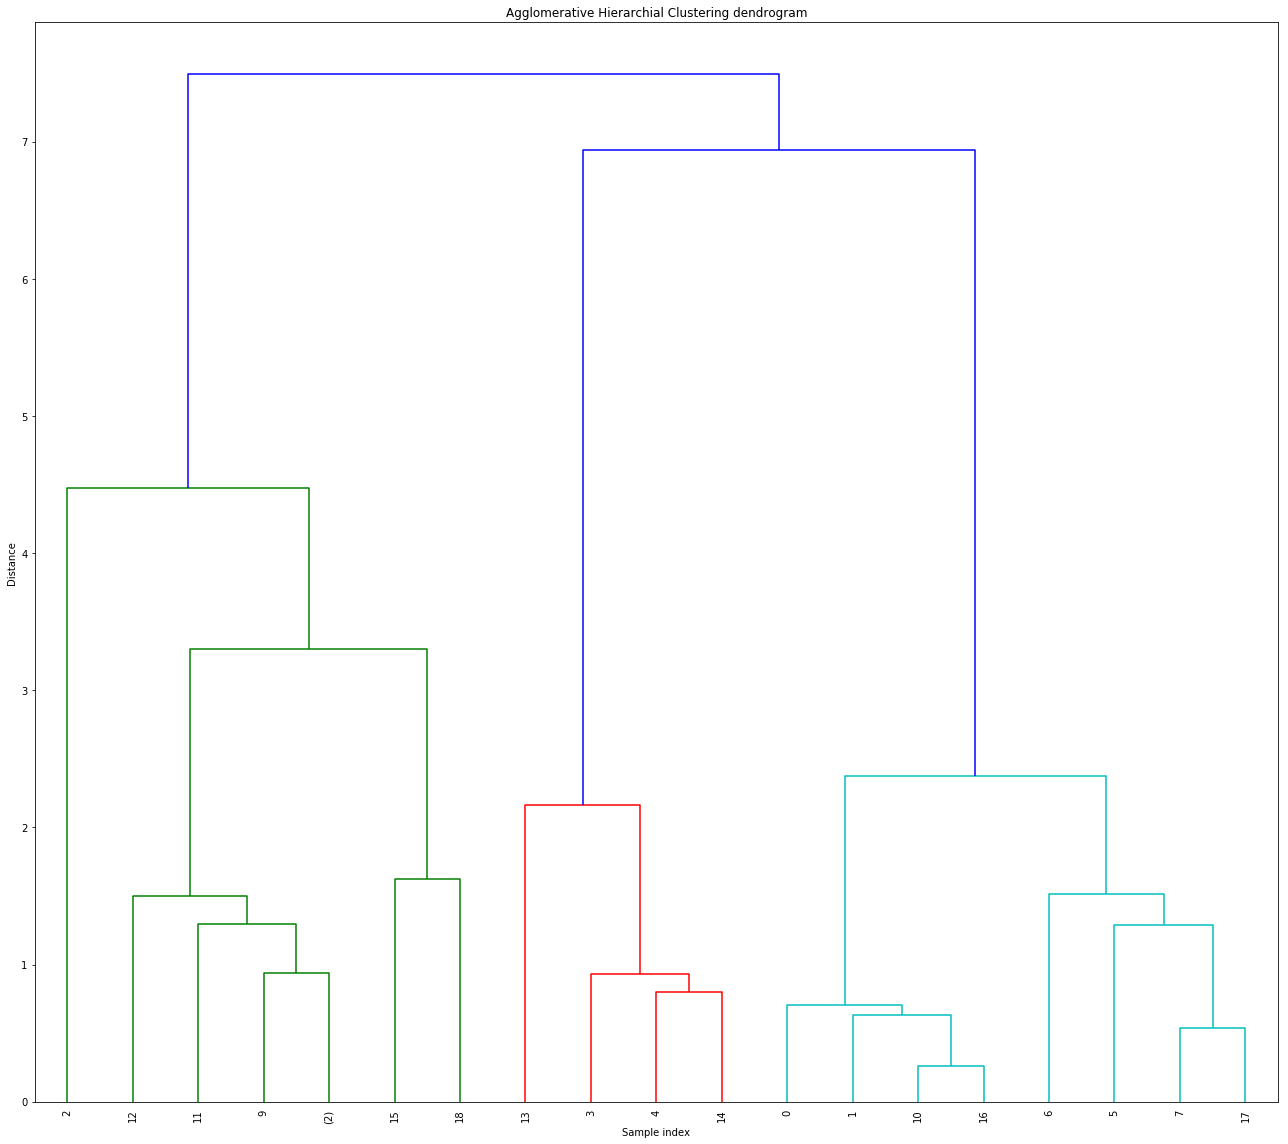

In [119]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(18,16))
plt.title('Agglomerative Hierarchial Clustering dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance'
z = linkage(scaled_beer_df,'ward')
dendrogram(z,leaf_rotation=90.0,p=5,color_threshold=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [122]:
beer_df.iloc[12]

name        Michelob_Light
calories               135
sodium                  11
alcohol                4.2
cost                   0.5
label                    0
Name: 12, dtype: object

In [123]:
beer_df.iloc[13]

name        Becks
calories      150
sodium         19
alcohol       4.7
cost         0.76
label           2
Name: 13, dtype: object

In [124]:
beer_df.iloc[6]

name        Augsberger
calories           175
sodium              24
alcohol            5.5
cost               0.4
label                1
Name: 6, dtype: object

# Conclusion